In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quandl
quandl.ApiConfig.api_key = 'mJs8xCEDp9WGJ95NaKNZ'

# 图一 加密货币汇率的极端波动

In [2]:
USD=quandl.get('BCHARTS/BITSTAMPUSD',start_date='2012-12-01',end_date='2015-05-31')

C:\Users\Kaiqi Zhang\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


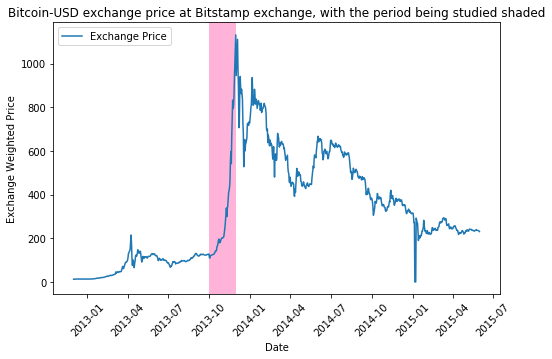

In [3]:
USD=USD.reset_index()
fig=plt.figure(figsize=(8,5))

plt.plot(USD['Date'], USD['Weighted Price'], label='Exchange Price')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Exchange Weighted Price')
plt.title('Bitcoin-USD exchange price at Bitstamp exchange, with the period being studied shaded')
plt.axvspan('2013-10-01', '2013-12-01', facecolor='#FF69B4', alpha=0.5)
plt.show()

# 划分交易种类

In [2]:
# 获取Mtgox JPY/BTC 价格
mtgoxUSD = quandl.get('BCHARTS/MTGOXUSD',
                      start_date='2011-04-01', end_date='2013-11-30')

In [3]:
pre = ['2012.01-06', '2012.07-10', '2012.11-12',
       '2013.01-03', '2013.04-06', '2013.07-10', '2013-11']

In [4]:
# 读入待划分数据
data = pd.read_csv('2011处理完毕.csv')
for i in pre:
    df = pd.read_csv(i+'处理完毕.csv')
    data = data.append(df)
data['Date'] = pd.to_datetime(
    data['Date'].astype('datetime64[D]', format='%Y-%m-%d'))
data.head()

C:\Users\Kaiqi Zhang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Trade_Id,Date,User_Id,Type,Currency,Bitcoins,Money,Money_Rate,Money_JPY
0,35372,2011-04-01,3931,buy,USD,23.02,18.061,82.783135,1495.146203
1,35372,2011-04-01,895,sell,USD,23.02,18.061,82.783135,1495.146203
2,35373,2011-04-01,722,buy,USD,10.00,7.800,82.783135,645.708454
3,35373,2011-04-01,895,sell,USD,10.00,7.800,82.783135,645.708454
4,35374,2011-04-01,3605,buy,USD,35.00,27.300,82.783135,2259.979588


In [5]:
grouped = data.pivot_table('Money_Rate', index='Date', columns='Currency')
Rate = grouped.USD
c = pd.DataFrame([Rate]).T
df = pd.merge(data, c, left_on=data.Date, right_index=True)
df['USD_Money'] = df['Money_JPY']/df['USD']
df.drop(['key_0'], axis=1, inplace=True)
df['Price'] = df['USD_Money']/df['Bitcoins']

In [6]:
mtg = mtgoxUSD[['High', 'Low']]
mtg.High = mtg.High*1.5
mtg.Low = mtg.Low*0.5
last = pd.merge(df, mtg, left_on=df.Date, right_index=True)
last.drop(['key_0'], axis=1, inplace=True)
last.reset_index(inplace = True)
last.drop(['index','Currency','Money_JPY','Money_Rate','USD'], axis=1, inplace=True)
last

C:\Users\Kaiqi Zhang\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Trade_Id,Date,User_Id,Type,Bitcoins,Money,USD_Money,Price,High,Low
0,35372,2011-04-01,3931,buy,23.020000,18.06100,18.061000,0.784579,1.195455,0.38705
1,35372,2011-04-01,895,sell,23.020000,18.06100,18.061000,0.784579,1.195455,0.38705
2,35373,2011-04-01,722,buy,10.000000,7.80000,7.800000,0.780000,1.195455,0.38705
3,35373,2011-04-01,895,sell,10.000000,7.80000,7.800000,0.780000,1.195455,0.38705
4,35374,2011-04-01,3605,buy,35.000000,27.30000,27.300000,0.780000,1.195455,0.38705
5,35374,2011-04-01,895,sell,35.000000,27.30000,27.300000,0.780000,1.195455,0.38705
6,35375,2011-04-01,3966,buy,10.600000,8.24600,8.246000,0.777925,1.195455,0.38705
7,35375,2011-04-01,895,sell,10.600000,8.24600,8.246000,0.777925,1.195455,0.38705
8,35376,2011-04-01,3353,buy,176.214000,136.92000,136.920000,0.777010,1.195455,0.38705
9,35376,2011-04-01,895,sell,176.214000,136.92000,136.920000,0.777010,1.195455,0.38705


In [7]:
EHAs = last[last.Price > last.High]
ELAs = last[last.Price < last.Low]
N = last[last.Price < last.High]
NMAs = N[N.Price > N.Low]

In [16]:
EHAs

,Trade_Id,Date,User_Id,Type,Bitcoins,Money,USD_Money,Price,High,Low
343482,217298,2011-06-19,45295,buy,0.000000e+00,0.00500,0.00500,inf,28.314900,8.42500
343483,217298,2011-06-19,16766,sell,0.000000e+00,0.00500,0.00500,inf,28.314900,8.42500
366400,1309275069175603,2011-06-28,1,buy,2.000000e-02,8.04894,8.04894,402.447000,26.280000,8.25000
366401,1309275069175603,2011-06-28,64781,sell,2.000000e-02,8.04894,8.04894,402.447000,26.280000,8.25000
366402,1309275072841429,2011-06-28,1,buy,2.000000e-02,8.04894,8.04894,402.447000,26.280000,8.25000
366403,1309275072841429,2011-06-28,64781,sell,2.000000e-02,8.04894,8.04894,402.447000,26.280000,8.25000
366404,1309275082167035,2011-06-28,1,buy,2.000000e-02,8.04894,8.04894,402.447000,26.280000,8.25000
366405,1309275082167035,2011-06-28,64781,sell,2.000000e-02,8.04894,8.04894,402.447000,26.280000,8.25000
366406,1309275089468461,2011-06-28,1,buy,2.000000e-02,8.04894,8.04894,402.447000,26.280000,8.25000
366407,1309275089468461,2011-06-28,64781,sell,2.000000e-02,8.04894,8.04894,402.447000,26.280000,8.25000


In [17]:
ELAs

,Trade_Id,Date,User_Id,Type,Bitcoins,Money,USD_Money,Price,High,Low
346550,1309108565842636,2011-06-26,634,buy,2.000000e+00,2.00000,2.000000,1.000000,26.265015,7.005000
346551,1309108565842636,2011-06-26,634,sell,2.000000e+00,2.00000,2.000000,1.000000,26.265015,7.005000
366388,1309274703583484,2011-06-28,1,buy,3.270000e+00,8.04894,8.048940,2.461450,26.280000,8.250000
366389,1309274703583484,2011-06-28,23790,sell,3.270000e+00,8.04894,8.048940,2.461450,26.280000,8.250000
366390,1309274820633715,2011-06-28,40256,buy,2.115607e+00,8.04894,8.048940,3.804553,26.280000,8.250000
366391,1309274820633715,2011-06-28,30322,sell,2.115607e+00,8.04894,8.048940,3.804553,26.280000,8.250000
366392,1309274830535185,2011-06-28,40256,buy,7.884393e+00,8.04894,8.048940,1.020870,26.280000,8.250000
366393,1309274830535185,2011-06-28,64387,sell,7.884393e+00,8.04894,8.048940,1.020870,26.280000,8.250000
366394,1309274889279279,2011-06-28,1,buy,1.320000e+00,8.04894,8.048940,6.097682,26.280000,8.250000
366395,1309274889279279,2011-06-28,9192,sell,1.320000e+00,8.04894,8.048940,6.097682,26.280000,8.250000


In [18]:
NMAs

,Trade_Id,Date,User_Id,Type,Bitcoins,Money,USD_Money,Price,High,Low
0,35372,2011-04-01,3931,buy,23.020000,18.06100,18.061000,0.784579,1.195455,0.38705
1,35372,2011-04-01,895,sell,23.020000,18.06100,18.061000,0.784579,1.195455,0.38705
2,35373,2011-04-01,722,buy,10.000000,7.80000,7.800000,0.780000,1.195455,0.38705
3,35373,2011-04-01,895,sell,10.000000,7.80000,7.800000,0.780000,1.195455,0.38705
4,35374,2011-04-01,3605,buy,35.000000,27.30000,27.300000,0.780000,1.195455,0.38705
5,35374,2011-04-01,895,sell,35.000000,27.30000,27.300000,0.780000,1.195455,0.38705
6,35375,2011-04-01,3966,buy,10.600000,8.24600,8.246000,0.777925,1.195455,0.38705
7,35375,2011-04-01,895,sell,10.600000,8.24600,8.246000,0.777925,1.195455,0.38705
8,35376,2011-04-01,3353,buy,176.214000,136.92000,136.920000,0.777010,1.195455,0.38705
9,35376,2011-04-01,895,sell,176.214000,136.92000,136.920000,0.777010,1.195455,0.38705


# 划分账户种类

In [9]:
# 找出所有同类账户并去重
def get_A(Userdata):
    pieces = dict(list(Userdata.groupby('Type')))
    _buy = pieces['buy']
    _sell = pieces['sell']
    s = _sell['User_Id']
    b = _buy['User_Id']
    Udata = pd.concat([s,b])
    Udata = pd.DataFrame(Udata)
    Udata.drop_duplicates(inplace=True)
    Udata.reset_index(inplace=True)
    Udata.drop(['index'], axis=1, inplace=True)
    return Udata

In [10]:
# 找出同类账户的所有完整交易
def get_trade(Users):
    U = Users['User_Id'].tolist()
    U_trade = last[last['User_Id'].isin(U)]
    trade_grouped=U_trade.pivot_table('Date',index='Trade_Id',columns='Type',aggfunc=len)
    print(len(trade_grouped))
    trade_g=trade_grouped[(trade_grouped['buy']==1) & (trade_grouped['sell']==1)]
    trade_end=U_trade[U_trade['Trade_Id'].isin(trade_g.index)]
    return trade_end

## 找出EHA账户及其所有完整交易

In [12]:
EHA = get_A(EHAs)
ELA = get_A(ELAs)
EHA_self_trade = get_trade(EHA)
ELA_self_trade = get_trade(ELA)

4530135


In [19]:
EHA_ELT = EHA_self_trade[EHA_self_trade.Price < EHA_self_trade.Low]
ELA_EHT = ELA_self_trade[ELA_self_trade.Price > ELA_self_trade.High]


In [20]:
EHA_ELT

,Trade_Id,Date,User_Id,Type,Bitcoins,Money,USD_Money,Price,High,Low
427278,1309857013026456,2011-07-05,1,buy,9.000000,13.940310,13.940310,1.548923,22.50,5.500000
427279,1309857013026456,2011-07-05,7506,sell,9.000000,13.940310,13.940310,1.548923,22.50,5.500000
427286,1309857013414971,2011-07-05,6589,buy,11.000000,13.940310,13.940310,1.267301,22.50,5.500000
427287,1309857013414971,2011-07-05,7506,sell,11.000000,13.940310,13.940310,1.267301,22.50,5.500000
427288,1309857013437782,2011-07-05,6589,buy,10.640000,13.940310,13.940310,1.310180,22.50,5.500000
427289,1309857013437782,2011-07-05,7506,sell,10.640000,13.940310,13.940310,1.310180,22.50,5.500000
427298,1309857013742278,2011-07-05,4841,buy,2.920000,13.940310,13.940310,4.774079,22.50,5.500000
427299,1309857013742278,2011-07-05,7506,sell,2.920000,13.940310,13.940310,4.774079,22.50,5.500000
445356,1309919906596087,2011-07-06,28856,buy,199.009240,199.009240,1143.010812,5.743506,24.75,6.335660
445357,1309919906596087,2011-07-06,28856,sell,199.009240,199.009240,1143.010812,5.743506,24.75,6.335660


In [21]:
ELA_EHT

,Trade_Id,Date,User_Id,Type,Bitcoins,Money,USD_Money,Price,High,Low
426592,1309854335070347,2011-07-05,25337,buy,6.200000e-01,51.95421,51.954210,83.797113,22.500000,5.500000
426593,1309854335070347,2011-07-05,20866,sell,6.200000e-01,51.95421,51.954210,83.797113,22.500000,5.500000
426608,1309854335386826,2011-07-05,17085,buy,6.000000e-01,51.95421,51.954210,86.590350,22.500000,5.500000
426609,1309854335386826,2011-07-05,20866,sell,6.000000e-01,51.95421,51.954210,86.590350,22.500000,5.500000
427290,1309857013460174,2011-07-05,4841,buy,3.000000e-02,13.94031,13.940310,464.677000,22.500000,5.500000
427291,1309857013460174,2011-07-05,7506,sell,3.000000e-02,13.94031,13.940310,464.677000,22.500000,5.500000
438350,1309894966308831,2011-07-05,1,buy,9.410000e-04,22.68774,22.687740,24110.244421,22.500000,5.500000
438351,1309894966308831,2011-07-05,42907,sell,9.410000e-04,22.68774,22.687740,24110.244421,22.500000,5.500000
439484,1309898437517944,2011-07-05,4926,buy,6.000000e-01,251.57337,251.573370,419.288950,22.500000,5.500000
439485,1309898437517944,2011-07-05,17085,sell,6.000000e-01,251.57337,251.573370,419.288950,22.500000,5.500000


In [107]:
EHA

,User_Id
0,16766
1,64781
2,20866
3,7506
4,17573
5,42982
6,42907
7,17085
8,11003
9,62672


In [78]:
EHA_self_trade

,Trade_Id,Date,User_Id,Type,Bitcoins,Money,USD_Money,Price,High,Low
2710,36791,2011-04-07,31,buy,10.000000,7.79500,7.795000,0.779500,1.177365,0.36025
2711,36791,2011-04-07,1375,sell,10.000000,7.79500,7.795000,0.779500,1.177365,0.36025
2764,36821,2011-04-08,31,buy,76.149000,59.67700,59.677000,0.783687,1.198500,0.36545
2765,36821,2011-04-08,3443,sell,76.149000,59.67700,59.677000,0.783687,1.198500,0.36545
2892,36889,2011-04-08,31,buy,180.830000,144.24000,144.240000,0.797655,1.198500,0.36545
2893,36889,2011-04-08,3443,sell,180.830000,144.24000,144.240000,0.797655,1.198500,0.36545
3026,36957,2011-04-08,31,buy,25.000000,18.74700,18.747000,0.749880,1.198500,0.36545
3027,36957,2011-04-08,3443,sell,25.000000,18.74700,18.747000,0.749880,1.198500,0.36545
3052,36970,2011-04-08,31,buy,300.000000,224.96600,224.966000,0.749887,1.198500,0.36545
3053,36970,2011-04-08,3443,sell,300.000000,224.96600,224.966000,0.749887,1.198500,0.36545


In [21]:
ELA

,User_Id
0,634
1,23790
2,30322
3,64387
4,9192
5,8361
6,33193
7,3866
8,28856
9,20866


In [80]:
ELA_self_trade

,Trade_Id,Date,User_Id,Type,Bitcoins,Money,USD_Money,Price,High,Low
820,35788,2011-04-04,3966,buy,33.129000,23.19000,23.190000,0.699991,1.177500,0.28095
821,35788,2011-04-04,646,sell,33.129000,23.19000,23.190000,0.699991,1.177500,0.28095
884,35820,2011-04-04,646,buy,10.000000,7.44000,7.440000,0.744000,1.177500,0.28095
885,35820,2011-04-04,1375,sell,10.000000,7.44000,7.440000,0.744000,1.177500,0.28095
930,35849,2011-04-04,646,buy,42.340000,28.79100,28.791000,0.679995,1.177500,0.28095
931,35849,2011-04-04,3966,sell,42.340000,28.79100,28.791000,0.679995,1.177500,0.28095
1280,36031,2011-04-05,3966,buy,23.682000,15.18000,15.180000,0.640993,1.121760,0.29000
1281,36031,2011-04-05,646,sell,23.682000,15.18000,15.180000,0.640993,1.121760,0.29000
1286,36034,2011-04-05,3966,buy,21.654000,13.88000,13.880000,0.640990,1.121760,0.29000
1287,36034,2011-04-05,646,sell,21.654000,13.88000,13.880000,0.640990,1.121760,0.29000


In [16]:
NMA = get_A(NMAs)
NMA

,User_Id
0,895
1,2387
2,3258
3,100
4,2404
5,3341
6,3914
7,1559
8,4205
9,646


In [114]:
NMA_self_trade = get_trade(NMA)

In [115]:
NMA_self_trade

,Trade_Id,Date,User_Id,Type,Bitcoins,Money,USD_Money,Price,High,Low
0,35372,2011-04-01,3931,buy,23.020000,18.06100,18.061000,0.784579,1.195455,0.38705
1,35372,2011-04-01,895,sell,23.020000,18.06100,18.061000,0.784579,1.195455,0.38705
2,35373,2011-04-01,722,buy,10.000000,7.80000,7.800000,0.780000,1.195455,0.38705
3,35373,2011-04-01,895,sell,10.000000,7.80000,7.800000,0.780000,1.195455,0.38705
4,35374,2011-04-01,3605,buy,35.000000,27.30000,27.300000,0.780000,1.195455,0.38705
5,35374,2011-04-01,895,sell,35.000000,27.30000,27.300000,0.780000,1.195455,0.38705
6,35375,2011-04-01,3966,buy,10.600000,8.24600,8.246000,0.777925,1.195455,0.38705
7,35375,2011-04-01,895,sell,10.600000,8.24600,8.246000,0.777925,1.195455,0.38705
8,35376,2011-04-01,3353,buy,176.214000,136.92000,136.920000,0.777010,1.195455,0.38705
9,35376,2011-04-01,895,sell,176.214000,136.92000,136.920000,0.777010,1.195455,0.38705


In [14]:
ABA = pd.concat([EHA,ELA])
ABA.drop_duplicates(inplace=True)
ABA.reset_index(inplace=True)
ABA.drop(['index'],axis = 1, inplace = True)
ABA

,User_Id
0,16766
1,64781
2,20866
3,7506
4,17573
5,42982
6,42907
7,17085
8,11003
9,62672


In [15]:
ABA_trade = get_trade(ABA)
ABA_trade

4991313


,Trade_Id,Date,User_Id,Type,Bitcoins,Money,USD_Money,Price,High,Low
636,35694,2011-04-04,231,buy,244.000000,182.99900,182.999000,0.749996,1.177500,0.28095
637,35694,2011-04-04,646,sell,244.000000,182.99900,182.999000,0.749996,1.177500,0.28095
820,35788,2011-04-04,3966,buy,33.129000,23.19000,23.190000,0.699991,1.177500,0.28095
821,35788,2011-04-04,646,sell,33.129000,23.19000,23.190000,0.699991,1.177500,0.28095
884,35820,2011-04-04,646,buy,10.000000,7.44000,7.440000,0.744000,1.177500,0.28095
885,35820,2011-04-04,1375,sell,10.000000,7.44000,7.440000,0.744000,1.177500,0.28095
930,35849,2011-04-04,646,buy,42.340000,28.79100,28.791000,0.679995,1.177500,0.28095
931,35849,2011-04-04,3966,sell,42.340000,28.79100,28.791000,0.679995,1.177500,0.28095
1280,36031,2011-04-05,3966,buy,23.682000,15.18000,15.180000,0.640993,1.121760,0.29000
1281,36031,2011-04-05,646,sell,23.682000,15.18000,15.180000,0.640993,1.121760,0.29000


In [11]:
# EHAs.to_csv('EHA.csv')
# ELAs.to_csv('ELA.csv')
# NMAs.to_csv('NMA.csv')

# 划分绘图元组

In [11]:
def AtoG(tdata):
    pieces = dict(list(tdata.groupby('Type')))
    _buy = pieces['buy']
    _sell = pieces['sell']
    s = pd.DataFrame(_sell['User_Id']).reset_index()
    b = pd.DataFrame(_buy[['User_Id', 'USD_Money', 'Date']]).reset_index()
    s.drop(['index'], axis=1, inplace=True)
    b.drop(['index'], axis=1, inplace=True)
    pr = pd.merge(s, b, how='outer', left_index=True, right_index=True)
    final = pr.groupby([pr['User_Id_x'], pr['User_Id_y']]).sum()
    return final
# 将同类账户的卖方和买方提取成两列，貌似没用
# def A_get(tdata):
#     pieces = dict(list(tdata.groupby('Type')))
#     _buy = pieces['buy']
#     _sell = pieces['sell']
#     s = pd.DataFrame(_sell['User_Id']).reset_index()
#     b = pd.DataFrame(_buy['User_Id']).reset_index()
#     s.drop(['index'], axis=1, inplace=True)
#     b.drop(['index'], axis=1, inplace=True)
#     final = pd.merge(s, b, how='outer', left_index=True, right_index=True)
#     return final

In [12]:
EHG = AtoG(EHAs)
ELG = AtoG(ELAs)
NMG = AtoG(NMAs)

In [22]:
# HA = A_get(EHAs)
# HA.drop_duplicates(inplace=True)
# HA

,User_Id_x,User_Id_y
0,16766,45295
1,64781,1
5,20866,25337
6,20866,63072
7,20866,24387
8,20866,42982
9,20866,17085
10,7506,42982
11,7506,4841
12,7506,12022


In [13]:
EHG

USD_Money
User_Id_x User_Id_y              
31        84490      9.713985e+01
34        84490      2.685000e+01
1375      2205       1.016601e+01
2506      75939      6.553980e+00
          84490      4.180590e+02
3165      84490      2.024720e+02
3443      84490      2.024720e+02
4125      17085      4.716000e+01
          23502      1.512301e+01
          25337      4.716000e+01
          57157      1.414800e+02
          65688      4.716000e+01
4318      62181      1.000000e-05
          76260      1.000000e-05
4505      84490      8.925057e+02
4558      84490      2.685000e+01
4841      21732      5.867067e+01
          69509      1.346601e+02
4936      84490      9.713985e+01
6756      84490      2.024720e+02
7192      84490      2.024720e+02
7336      84490      1.646626e+03
7506      4841       1.394031e+01
          12022      1.394031e+01
          42982      1.394031e+01
8511      57157      1.594817e+01
9399      84490      1.107502e+03
9423      84490      2.024720e+02
10619     84490      9.713985e+01
10947     2205       1.016601e+01
...                           ...
97488     698630     1.066944e+04
97624     698630     4.938742e+03
97783     698630     3.494574e+03
97797     698630     4.401209e+01
98383     698630     4.366324e+02
98538     698630     6.539295e+02
99040     698630     1.006806e+03
99189     698630     1.011608e+05
99215     698630     3.609036e+03
9927      698630     1.064539e+03
99290     698630     1.236686e+02
99378     698630     5.299828e+02
99886     698630     2.021159e+03
99999     698630     5.145977e+02
THK       164623     1.000961e-05
          202136     1.000961e-05
          240511     1.999120e-05
          286337     1.000961e-05
          296219     1.000961e-05
          310911     1.000961e-05
          366359     1.000961e-05
          37200      4.003844e-05
          384493     1.000961e-05
          415457     1.000961e-05
          463349     1.977183e-05
          503102     1.000961e-05
          519265     1.000961e-05
          630894     1.954843e-05
          698630     1.101735e+06
          722334     1.964309e-05

[2657 rows x 1 columns]

In [14]:
ELG

USD_Money
User_Id_x          User_Id_y                        
1                  1                    53559.132160
                   84490                   23.114440
31                 84490                  160.120610
34                 84490                    1.866120
116                84490                   29.184980
131                19563                    1.447700
237                84490                    0.540740
337                337                    210.267821
615                615                      2.268895
634                634                      2.000000
646                84490                    0.735100
914                84490                   26.850000
1136               84490                    0.051010
1224               1224                    72.065994
1375               1375                     0.226261
                   2205                    10.166010
2205               2434                    39.950200
2463               84490                    0.049820
2537               84490                    0.540740
2601               2601                   104.469822
2635               28856                    3.098020
2687               84490                   14.692010
2818               28856                    3.098020
                   84490                    0.591750
2852               84490                   27.390740
3039               3039                     8.374550
3357               3357                    41.323440
                   84490                   97.139850
3443               84490                   80.601010
3866               1                       17.016790
...                                              ...
96105              698630                 509.220873
96125              698630                 434.235169
96133              698630                 971.286995
96272              698630                  35.507282
96376              698630                2432.416467
96790              698630                  27.286911
96853              698630                   1.817437
9705               698630                 341.836248
97228              698630                  39.055907
97488              698630                 307.290336
97783              698630                   1.356136
97847              698630                3474.057438
97927              698630                 248.939157
98254              698630                   1.757997
98313              698630                  14.245491
9832               698630                  59.801956
98507              698630                 136.276824
98560              698630                  75.467463
99145              698630                  60.885610
99189              698630                 149.529372
99238              698630                   1.266148
9927               698630                   2.892284
99378              698630                 264.991419
99452              698630                   5.965131
99770              698630                  13.127989
99886              698630                   0.270184
99999              698630                5954.317979
THK                662355                   0.000000
                   698630              142281.158255
TIBANNE_LIMITED_HK TIBANNE_LIMITED_HK       0.000000

[4437 rows x 1 columns]

In [15]:
NMG

USD_Money
User_Id_x User_Id_y               
1         1          562993.522708
          2              32.000000
          8              42.419460
          23              9.813920
          30            424.135200
          31           4844.104080
          34            156.259560
          44             53.350000
          48             14.305540
          49          15831.395500
          54            422.534000
          57            677.943670
          60            132.299100
          63           1061.435990
          79             27.718500
          95             18.674790
          96             41.579400
          98            184.224220
          100           237.018800
          103           179.665000
          110          1308.426000
          118           866.639500
          129           121.239010
          131          3214.631250
          141           130.844880
          150         30886.415390
          151          5054.508110
          154           117.588000
          166           122.717600
          173         27934.084510
...                            ...
THK       99503         145.737867
          99508         153.552905
          99560          16.337537
          99593         241.000407
          9962          452.873248
          99626        2329.710376
          99639         800.467984
          99640          89.666420
          99657         306.605192
          99669        2465.483170
          99677           0.000316
          997          8869.696728
          99700         228.112357
          9977          247.760077
          99770         194.574847
          99776          49.411329
          99778           3.401499
          99779        1423.806958
          99794        5189.312975
          99863       16445.909064
          99877           0.160919
          99886           7.899645
          99897        4923.424897
          99902        7866.473200
          99909         674.490104
          99910          77.364893
          99940           8.712189
          99976         157.673747
          99988        2069.277329
          99999      142935.679578

[3046387 rows x 1 columns]

In [16]:
# EHG.to_csv('EHG.csv')
# ELG.to_csv('ELG.csv')
# NMG.to_csv('NMG.csv')